In [1]:
import ikpy
import numpy as np
from ikpy import plot_utils
from os.path import abspath
from pypot.creatures import PoppyTorso

scene_path = abspath('./vrep-sensors/torso_sensors_scene.ttt')
config_path = abspath('./vrep-sensors/torso_vrep_sensors_config.json')
poppy = PoppyTorso(simulator='vrep', scene=scene_path, config=config_path)

In [2]:
[motors.name for motors in poppy.motors]

[u'l_elbow_y',
 u'head_y',
 u'r_arm_z',
 u'head_z',
 u'r_shoulder_x',
 u'r_shoulder_y',
 u'r_elbow_y',
 u'l_arm_z',
 u'abs_z',
 u'bust_y',
 u'bust_x',
 u'l_shoulder_x',
 u'l_shoulder_y']

In [3]:
#print(poppy.kinematic_chains)
#print(poppy.l_arm_chain)
#print(poppy.r_arm_chain)

In [4]:
[m.name for m in poppy.l_arm_chain.motors]

[u'abs_z',
 u'bust_y',
 u'bust_x',
 u'l_shoulder_y',
 u'l_shoulder_x',
 u'l_arm_z',
 u'l_elbow_y']

In [5]:
poppy.l_arm_chain.end_effector

array([ 0.19028224, -0.1675791 ,  0.08322028])

In [6]:
poppy.l_arm_chain.joints_position



[0.0, 0.1, -0.2, 3.0999999999999943, 33.5, -0.4, 0.7999999999999972]

<IPython.core.display.Javascript object>


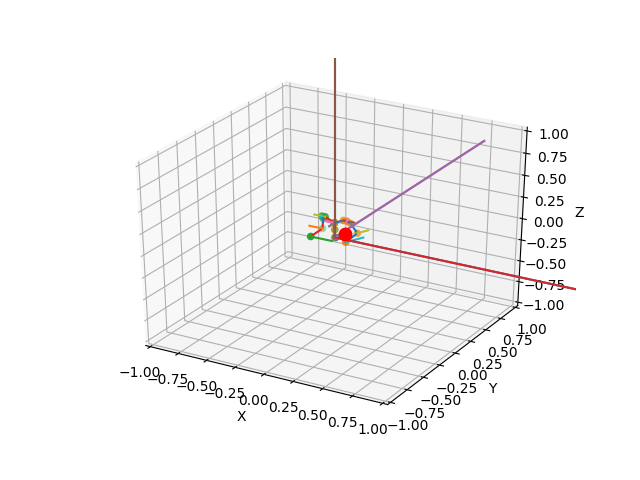

In [7]:
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
zero = [0] * 7

ax = matplotlib.pyplot.figure().add_subplot(111, projection='3d')
ax.scatter([0], [0],[0])

poppy.l_arm_chain.plot(poppy.l_arm_chain.convert_to_ik_angles(poppy.l_arm_chain.joints_position), ax, target = (0.2, -0.2, 0.2))
poppy.r_arm_chain.plot(poppy.r_arm_chain.convert_to_ik_angles(poppy.r_arm_chain.joints_position), ax)

In [15]:
poppy.l_arm_chain.goto((0.0, -0.15, 0.35), 2., wait=True)

In [14]:
poppy.l_arm_chain.goto((0.1092569 , -0.17510326,  0.06937395), 2., wait=True)

In [19]:
import numpy as np
r = .13
x0, y0, z0 = (0.2, -0.2, 0.2)

poppy.l_arm_chain.goto((x0, y0, z0), 1., wait=True)


for alpha in np.arange(0, 4*np.pi, .08):
    x = r * np.cos(alpha) + x0
    z = r * np.sin(alpha) + z0
    
    poppy.l_arm_chain.goto((x, y0, z), 0.03, wait=True)